In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.font_manager as fm
# 1. 폰트 매니저에 새로운 폰트 등록
fe = fm.FontEntry(
    fname='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', 
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)

# 2. 기본 폰트로 설정
plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic', 'axes.unicode_minus': False})

### Wake Word

In [ ]:
df = pd.read_excel("./data/돌봄 로봇 평가 척도.xlsx", sheet_name="Wake Word").iloc[:,:8]
# 범주형 변수의 기본값 설정
df['발화 속도'] = pd.Categorical(df['발화 속도'], categories=['보통', '느림', '빠름'], ordered=False)
df['소음'] = pd.Categorical(df['소음'], categories=['무소음', 'TV 소음', '대화 소음', '생활 소음'], ordered=False)
df['화자'] = pd.Categorical(df['화자'], categories=['성인', '어린이', '노인'], ordered=False)
df

,문항 번호,거리(m),각도(°),발화 속도,소음,화자,성공 여부,실패 여부
0,1,1,0,느림,무소음,어린이,1,0
1,2,1,0,느림,무소음,성인,1,0
2,3,1,0,느림,무소음,노인,0,1
3,4,1,0,느림,TV 소음,어린이,1,0
4,5,1,0,느림,TV 소음,성인,0,1
...,...,...,...,...,...,...,...,...
319,320,10,180,빠름,대화 소음,성인,1,0
320,321,10,180,빠름,대화 소음,노인,0,1
321,322,10,180,빠름,생활 소음,어린이,1,0
322,323,10,180,빠름,생활 소음,성인,1,0


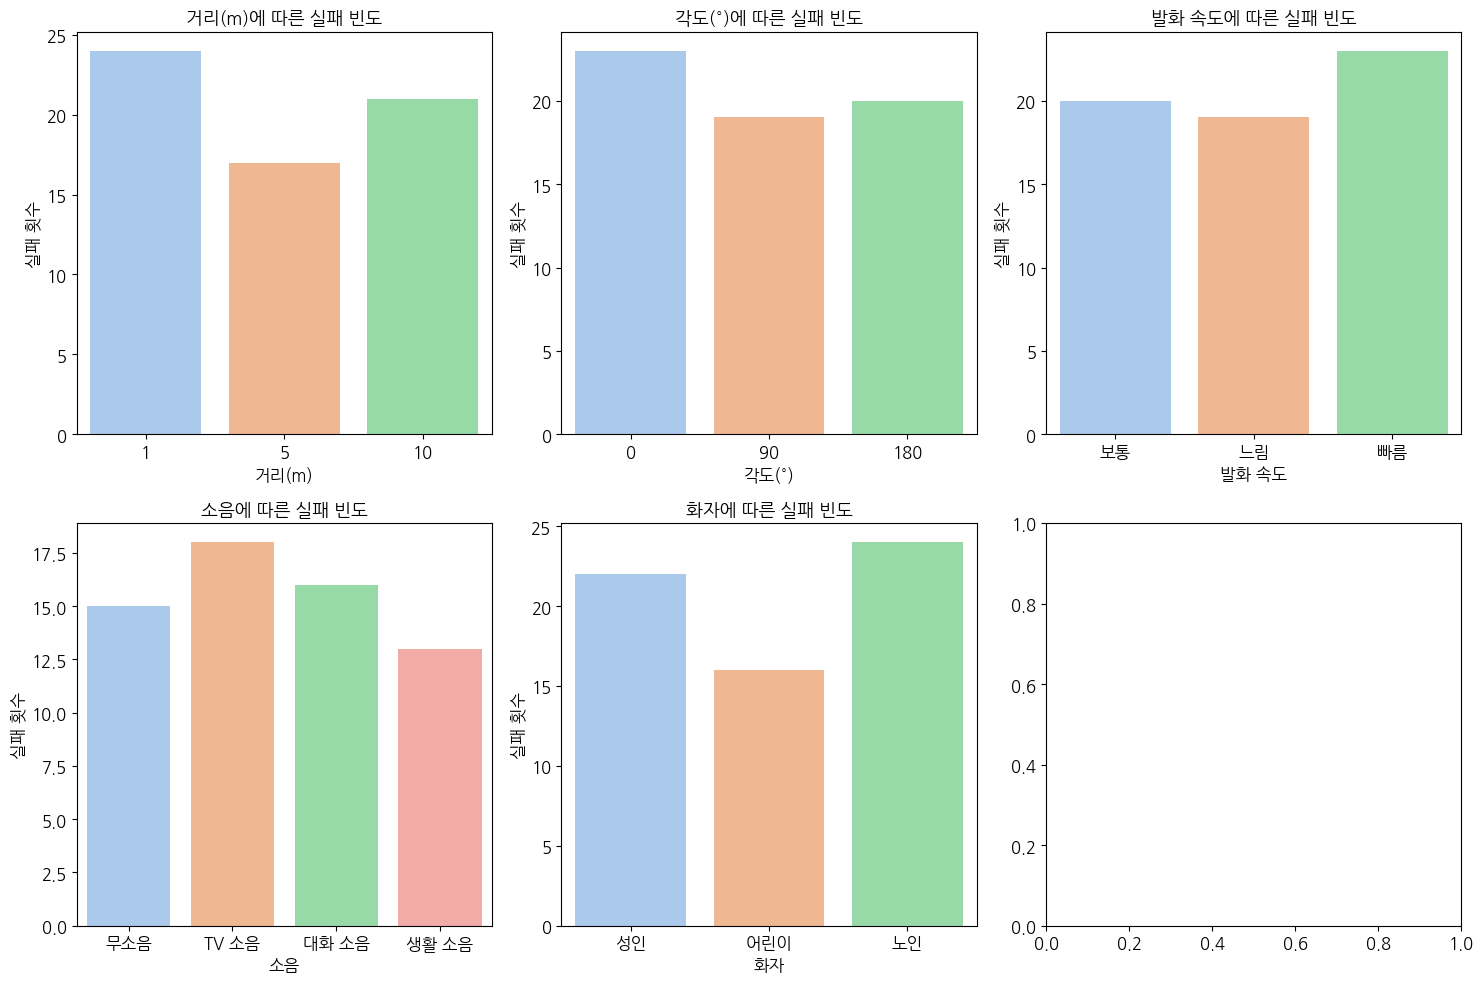

In [ ]:
cols = ['거리(m)', '각도(°)', '발화 속도', '소음', '화자']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten() # 2차원 배열을 1차원으로 펼침

for i, col in enumerate(cols):
    sns.barplot(
        data=df,
        x=col,
        y='실패 여부',
        hue=col,
        estimator=sum,
        ax=axs[i],
        palette='pastel',
        errorbar=None,
        legend=False
    )
    axs[i].set_title(f'{col}에 따른 실패 빈도', fontsize=13)
    axs[i].set_ylabel('실패 횟수')

plt.tight_layout()
plt.show()

In [ ]:
formula = "Q('실패 여부') ~ Q('거리(m)') + Q('각도(°)') + C(Q('발화 속도')) + C(Q('소음')) + C(Q('화자'))"
model = smf.logit(formula=formula, data=df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.481744
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Q('실패 여부')   No. Observations:                  324
Model:                          Logit   Df Residuals:                      314
Method:                           MLE   Df Model:                            9
Date:                Mon, 02 Feb 2026   Pseudo R-squ.:                 0.01320
Time:                        13:19:59   Log-Likelihood:                -156.08
converged:                       True   LL-Null:                       -158.17
Covariance Type:            nonrobust   LLR p-value:                    0.8995
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.2636      0.480     -2.633      0.008      -2.204      -0.323
C(

In [ ]:
print("\n[오즈비 - Odds Ratio]")
print(np.exp(result.params))


[오즈비 - Odds Ratio]
Intercept              0.282628
C(Q('발화 속도'))[T.느림]    0.938691
C(Q('발화 속도'))[T.빠름]    1.193009
C(Q('소음'))[T.TV 소음]    1.260058
C(Q('소음'))[T.대화 소음]    1.083912
C(Q('소음'))[T.생활 소음]    0.839884
C(Q('화자'))[T.어린이]      0.678279
C(Q('화자'))[T.노인]       1.117739
Q('거리(m)')             0.982716
Q('각도(°)')             0.998990
dtype: float64


### STT

In [ ]:
df = pd.read_excel("./data/돌봄 로봇 평가 척도.xlsx", sheet_name="STT").iloc[:,:9]
# 범주형 변수의 기본값 설정
df['발화 속도'] = pd.Categorical(df['발화 속도'], categories=['보통', '느림', '빠름'], ordered=False)
df['소음'] = pd.Categorical(df['소음'], categories=['무소음', 'TV 소음', '대화 소음', '생활 소음'], ordered=False)
df['화자'] = pd.Categorical(df['화자'], categories=['성인', '어린이', '노인'], ordered=False)
df

,문항 번호,거리(m),각도(°),발화 속도,소음,화자,CER,성공 여부,실패 여부
0,1,1,0,느림,무소음,어린이,0.144583,0,1
1,2,1,0,느림,무소음,성인,0.069835,1,0
2,3,1,0,느림,무소음,노인,0.000596,1,0
3,4,1,0,느림,TV 소음,어린이,0.133109,0,1
4,5,1,0,느림,TV 소음,성인,0.118229,0,1
...,...,...,...,...,...,...,...,...,...
319,320,10,180,빠름,대화 소음,성인,0.214690,0,1
320,321,10,180,빠름,대화 소음,노인,0.035447,1,0
321,322,10,180,빠름,생활 소음,어린이,0.029860,1,0
322,323,10,180,빠름,생활 소음,성인,0.040643,1,0


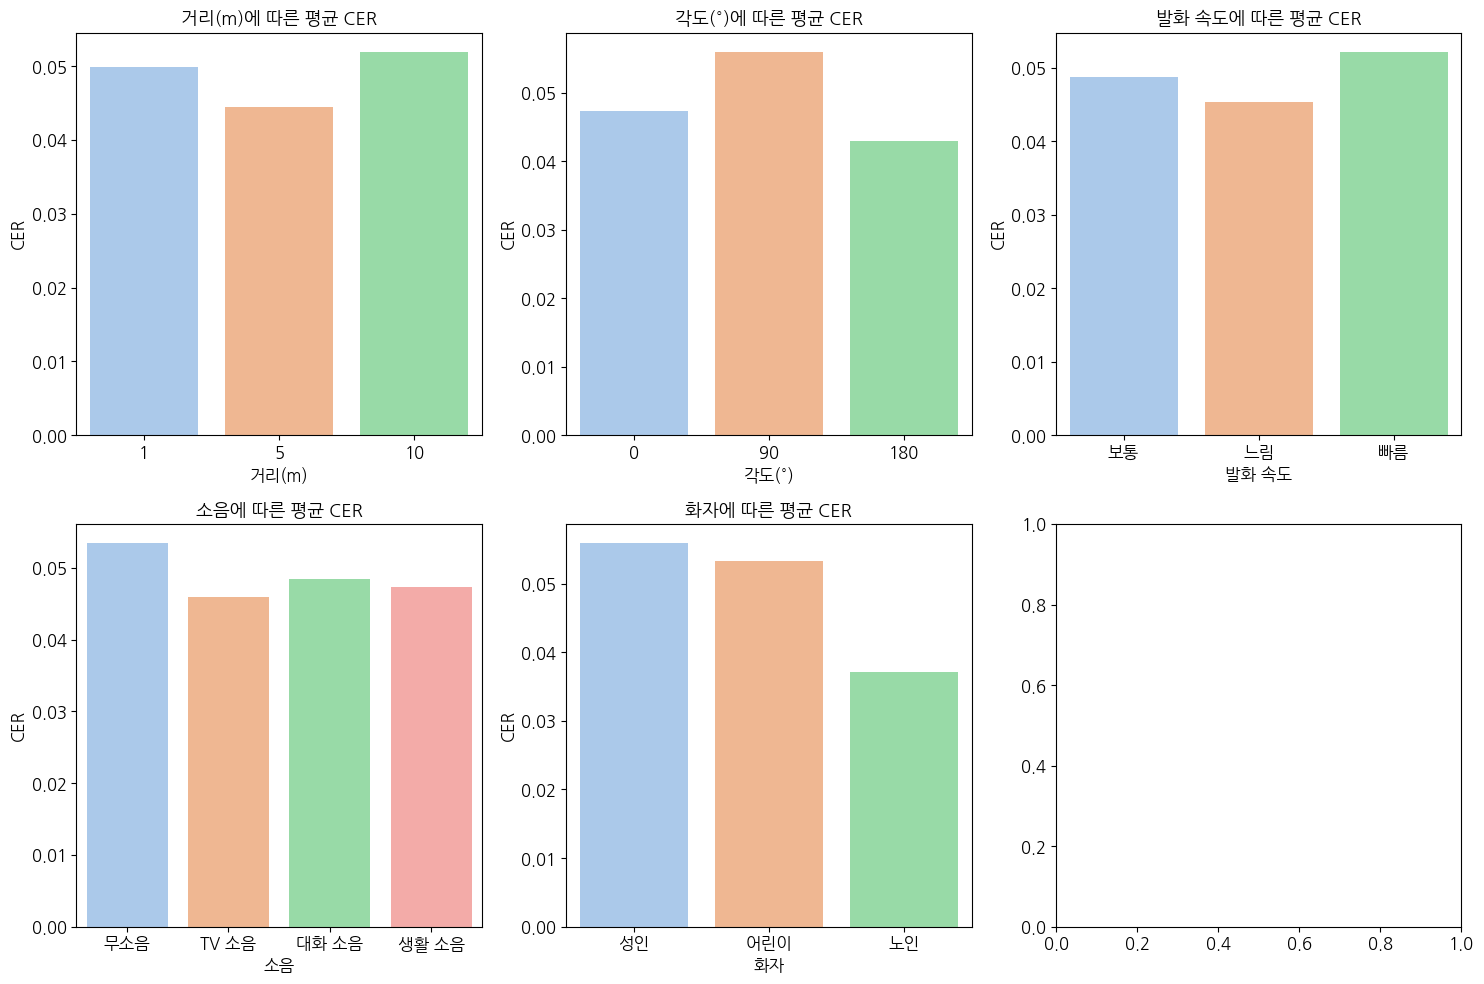

In [ ]:
cols = ['거리(m)', '각도(°)', '발화 속도', '소음', '화자']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten() # 2차원 배열을 1차원으로 펼침

for i, col in enumerate(cols):
    sns.barplot(
        data=df, 
        x=col, 
        y='CER',
        hue=col, 
        estimator='mean', 
        ax=axs[i],
        palette='pastel', 
        errorbar=None, 
        legend=False
    )
    axs[i].set_title(f'{col}에 따른 평균 CER', fontsize=13)
    axs[i].set_ylabel('CER')

plt.tight_layout()
plt.show()

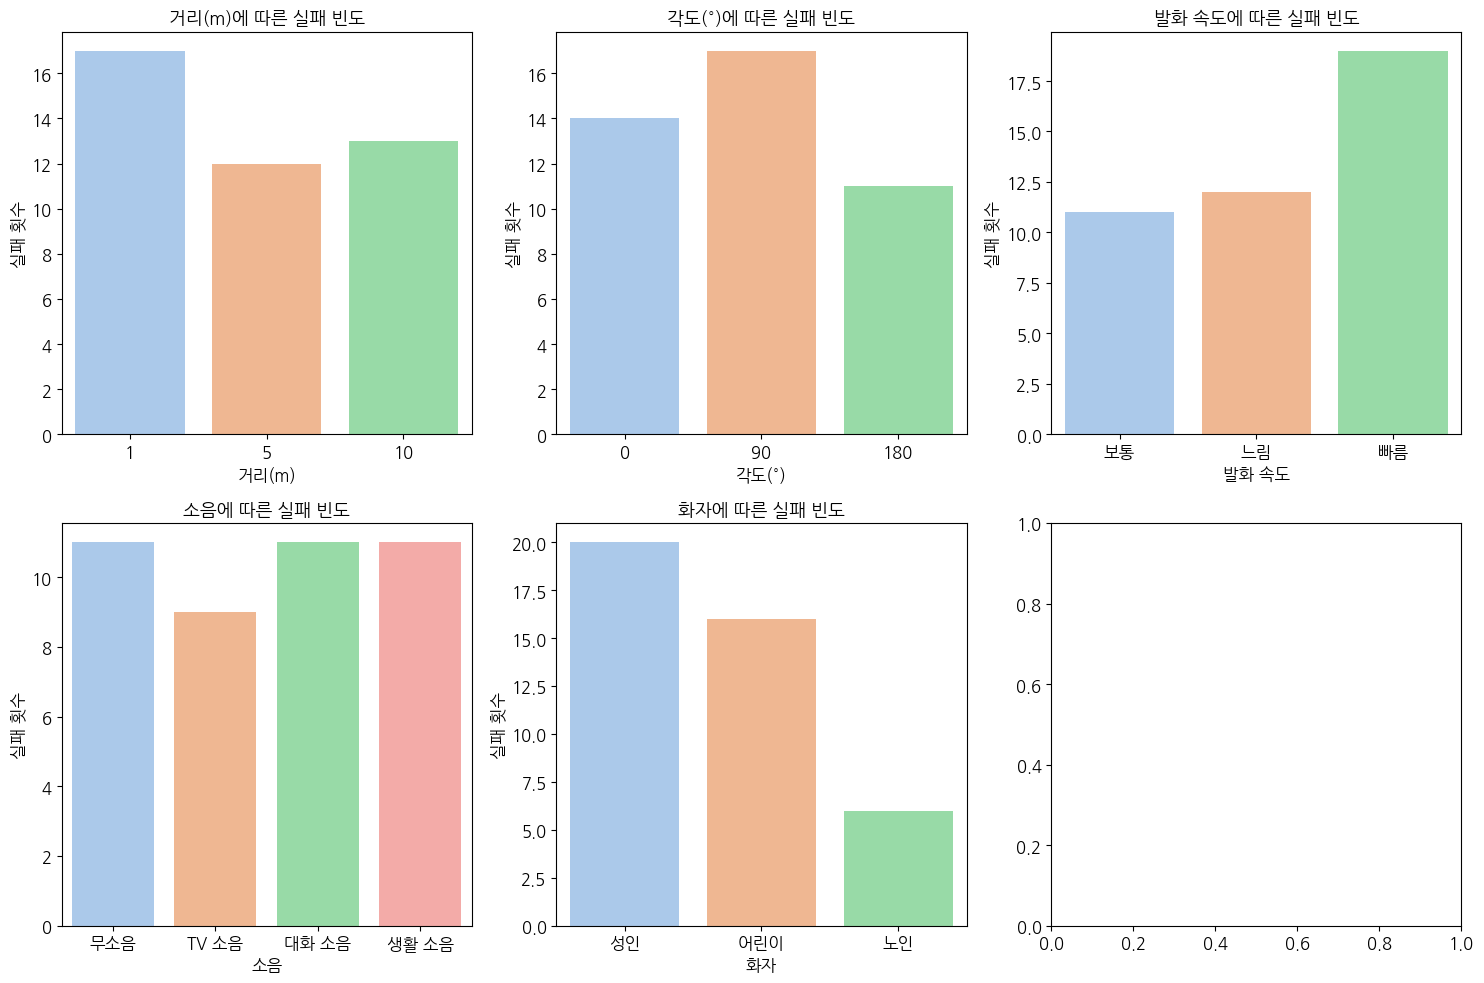

In [ ]:
cols = ['거리(m)', '각도(°)', '발화 속도', '소음', '화자']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten() # 2차원 배열을 1차원으로 펼침

for i, col in enumerate(cols):
    sns.barplot(
        data=df,
        x=col,
        y='실패 여부',
        hue=col,
        estimator=sum,
        ax=axs[i],
        palette='pastel',
        errorbar=None,
        legend=False
    )
    axs[i].set_title(f'{col}에 따른 실패 빈도', fontsize=13)
    axs[i].set_ylabel('실패 횟수')

plt.tight_layout()
plt.show()

In [ ]:
formula = "Q('실패 여부') ~ Q('거리(m)') + Q('각도(°)') + C(Q('발화 속도')) + C(Q('소음')) + C(Q('화자'))"
model = smf.logit(formula=formula, data=df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.364219
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Q('실패 여부')   No. Observations:                  324
Model:                          Logit   Df Residuals:                      314
Method:                           MLE   Df Model:                            9
Date:                Mon, 02 Feb 2026   Pseudo R-squ.:                 0.05565
Time:                        09:43:03   Log-Likelihood:                -118.01
converged:                       True   LL-Null:                       -124.96
Covariance Type:            nonrobust   LLR p-value:                    0.1256
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.3906      0.557     -2.497      0.013      -2.482      -0.299
C(

In [ ]:
print("\n[오즈비 - Odds Ratio]")
print(np.exp(result.params))


[오즈비 - Odds Ratio]
Intercept              0.110911
C(Q('발화 속도'))[T.느림]    1.722474
C(Q('발화 속도'))[T.빠름]    1.611735
C(Q('소음'))[T.TV 소음]    1.000000
C(Q('소음'))[T.대화 소음]    0.907709
C(Q('소음'))[T.생활 소음]    0.818382
C(Q('화자'))[T.어린이]      0.838368
C(Q('화자'))[T.노인]       1.825929
Q('거리(m)')             0.993960
Q('각도(°)')             1.000410
dtype: float64


In [1]:
from MyModule import get_alarms, set_alarms, delete_alarms

get_alarms()

{'alarms': [{'hour': 7,
   'minute': 0,
   'label': '식사',
   'days': [1, 1, 1, 0, 0, 0, 0],
   'repeat': True}],
 'count': 1}

In [6]:
set_alarms(hour=7, minute=0, relative_date=0, days=None, label='김치찌개', repeat=False)

{'status': 'success',
 'hour': 7,
 'minute': 0,
 'label': '김치찌개',
 'days': [0, 0, 0, 1, 0, 0, 0],
 'repeat': False,
 'message': '알람을 성공적으로 설정했습니다.'}

In [7]:
delete_alarms(label='김치')

{'status': 'success',
 'deleted_count': 2,
 'deleted_alarms': [{'hour': 7,
   'minute': 0,
   'label': '김치',
   'days': [0, 0, 0, 1, 0, 0, 0],
   'repeat': False},
  {'hour': 7,
   'minute': 0,
   'label': '김치찌개',
   'days': [0, 0, 0, 1, 0, 0, 0],
   'repeat': False}],
 'message': '성공적으로 2개의 알람을 삭제했습니다.'}

In [12]:
a = [1, 0, 0, 0, 0, 0, 0]
b = [0, 1, 0, 0, 0, 0, 0]

c = [x + y for x, y in zip(a, b)]
c

[1, 1, 0, 0, 0, 0, 0]

In [20]:
from datetime import datetime

weekday_num = datetime.today().weekday()
weekday_list = ["월", "화", "수", "목", "금", "토", "일"]
weekday_list[weekday_num]

'화'